# EDA

In [1]:
import os 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from scipy import stats

# Set some options...
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

cwd = os.getcwd()

for dirname, _, filenames in os.walk(f'{cwd}/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/Users/davitdadiani/Desktop/git/IEEE-CIS-Fraud-Detection-ML/input/test_transaction.csv
/Users/davitdadiani/Desktop/git/IEEE-CIS-Fraud-Detection-ML/input/train_identity.csv
/Users/davitdadiani/Desktop/git/IEEE-CIS-Fraud-Detection-ML/input/test_identity.csv
/Users/davitdadiani/Desktop/git/IEEE-CIS-Fraud-Detection-ML/input/sample_submission.csv
/Users/davitdadiani/Desktop/git/IEEE-CIS-Fraud-Detection-ML/input/train_transaction.csv


In [2]:
train_transaction = pd.read_csv(f'{cwd}/input/train_transaction.csv')
train_identity = pd.read_csv(f'{cwd}/input/train_identity.csv')

test_transaction = pd.read_csv(f'{cwd}/input/test_transaction.csv')
test_identity = pd.read_csv(f'{cwd}/input/test_identity.csv')

In [3]:
train = train_transaction.merge(train_identity, on="TransactionID", how="left") 
test = test_transaction.merge(test_identity, on="TransactionID", how="left")

# Some usefull functions

In [39]:
def plot_univariate(df, feature, bins=20):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=bins, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

def plot_bivariate(df, feature1, feature2):
    plt.figure(figsize=(10, 6))
    if df[feature1].dtype in ['float64', 'int64'] and df[feature2].dtype in ['float64', 'int64']:
        sns.scatterplot(x=df[feature1], y=df[feature2])
        plt.title(f'Relationship between {feature1} and {feature2}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
    else:
        sns.boxplot(x=df[feature1], y=df[feature2])
        plt.title(f'Box plot of {feature2} by {feature1}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
    
    plt.show()

def plot_countplot(df, feature1, feature2=None):
    plt.figure(figsize=(12, 6))
    
    if feature2:
        sns.countplot(data=df, x=feature1, hue=feature2)
        plt.title(f'Count of {feature1} segmented by {feature2}')
        plt.xlabel(feature1)
        plt.ylabel('Count')
        plt.legend(title=feature2)
    else:
        sns.countplot(data=df, x=feature1)
        plt.title(f'Count of {feature1}')
        plt.xlabel(feature1)
        plt.ylabel('Count')

    plt.show()

def get_num_and_cat_features(df):
    num = [feature for feature in df.columns if df[feature].dtype != 'object']
    cat = [feature for feature in df.columns if df[feature].dtype == 'object']
  
    return (num, cat)

def get_numerical_features(df):
    return get_num_and_cat_features(df)[0]

def get_categorical_features(df):
    return get_num_and_cat_features(df)[1]

def print_null_count(df, head=None):
    null_summary = df.isnull().sum()
    null_summary = null_summary[null_summary > 0].sort_values(ascending=False)
    if head != None:
        null_summary = null_summary.head(head)

    print(f"{'Feature':<20} {'Null Count':<12} {'Null %':<10}")
    print("-" * 45)

    for feature, null_count in null_summary.items():
        null_percentage = null_count / len(df)
        print(f"{feature:<20} {null_count:<12} {null_percentage:<10.5f}")

# Inspect Dataframes

In [5]:
print("Train shape -  Transaction: ", train_transaction.shape, "   Identity: ", train_identity.shape)
print("Test  shape -  Transaction: ", test_transaction.shape, "   Identity: ", test_identity.shape)

Train shape -  Transaction:  (590540, 394)    Identity:  (144233, 41)
Test  shape -  Transaction:  (506691, 393)    Identity:  (141907, 41)


In [6]:
print("Train shape: ", train.shape)
print("Test  shape: ", test.shape)

Train shape:  (590540, 434)
Test  shape:  (506691, 433)


In [8]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [9]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,vis

In [36]:
print_null_count(test, 20)

Feature              Null Count   Null %    
---------------------------------------------
id-24                501951       0.99065   
id-25                501652       0.99006   
id-26                501644       0.99004   
id-08                501632       0.99002   
id-07                501632       0.99002   
id-21                501632       0.99002   
id-22                501629       0.99001   
id-27                501629       0.99001   
id-23                501629       0.99001   
dist2                470255       0.92809   
id-18                455816       0.89959   
D7                   446558       0.88132   
id-04                440210       0.86879   
id-03                440210       0.86879   
D12                  437437       0.86332   
id-30                436032       0.86055   
id-32                436020       0.86052   
id-33                436020       0.86052   
id-14                435334       0.85917   
id-34                434516       0.85756   


In [37]:
print_null_count(test, 20)

Feature              Null Count   Null %    
---------------------------------------------
id-24                501951       0.99065   
id-25                501652       0.99006   
id-26                501644       0.99004   
id-08                501632       0.99002   
id-07                501632       0.99002   
id-21                501632       0.99002   
id-22                501629       0.99001   
id-27                501629       0.99001   
id-23                501629       0.99001   
dist2                470255       0.92809   
id-18                455816       0.89959   
D7                   446558       0.88132   
id-04                440210       0.86879   
id-03                440210       0.86879   
D12                  437437       0.86332   
id-30                436032       0.86055   
id-32                436020       0.86052   
id-33                436020       0.86052   
id-14                435334       0.85917   
id-34                434516       0.85756   


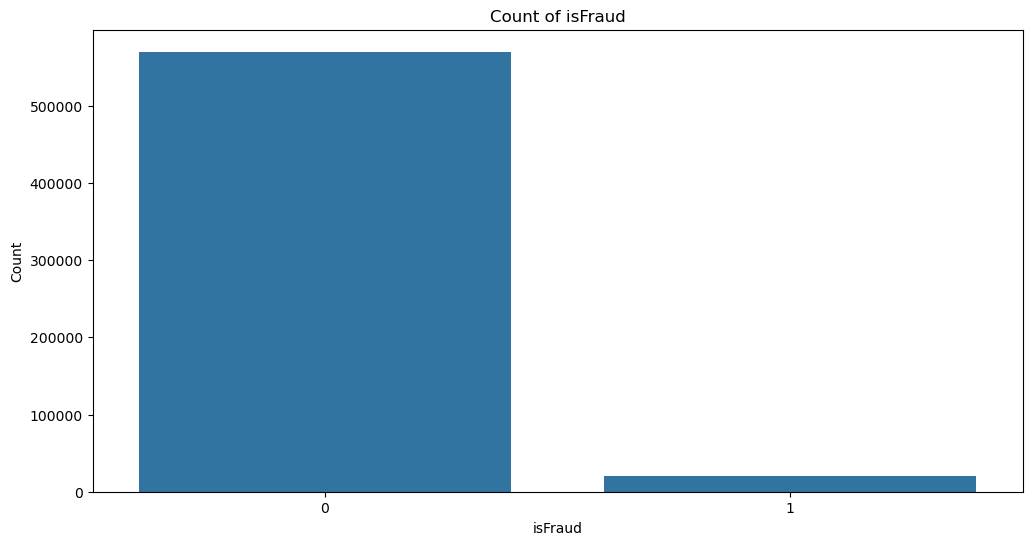

In [40]:
plot_countplot(train, "isFraud")

In [14]:
train["isFraud"].value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

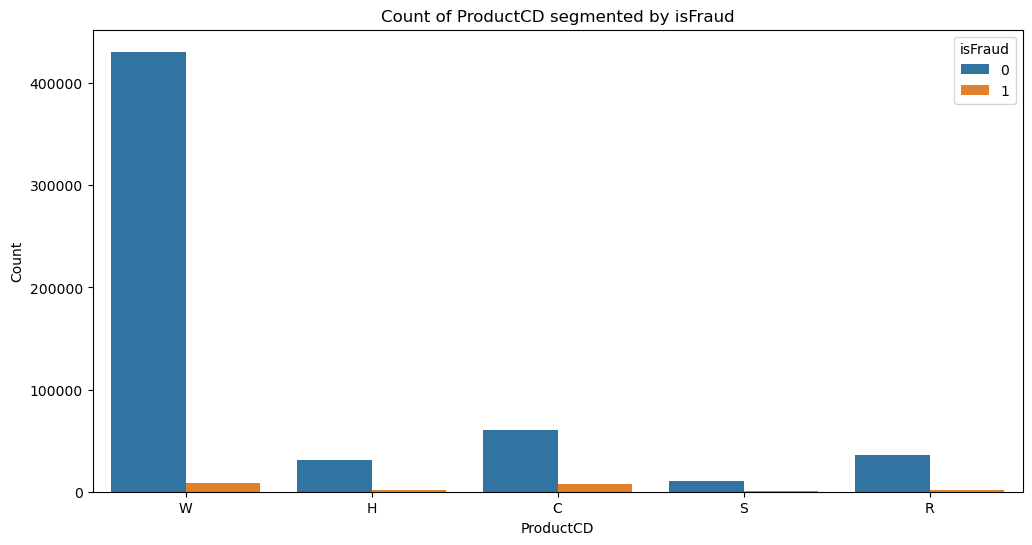

In [41]:
plot_countplot(train, "ProductCD", "isFraud")

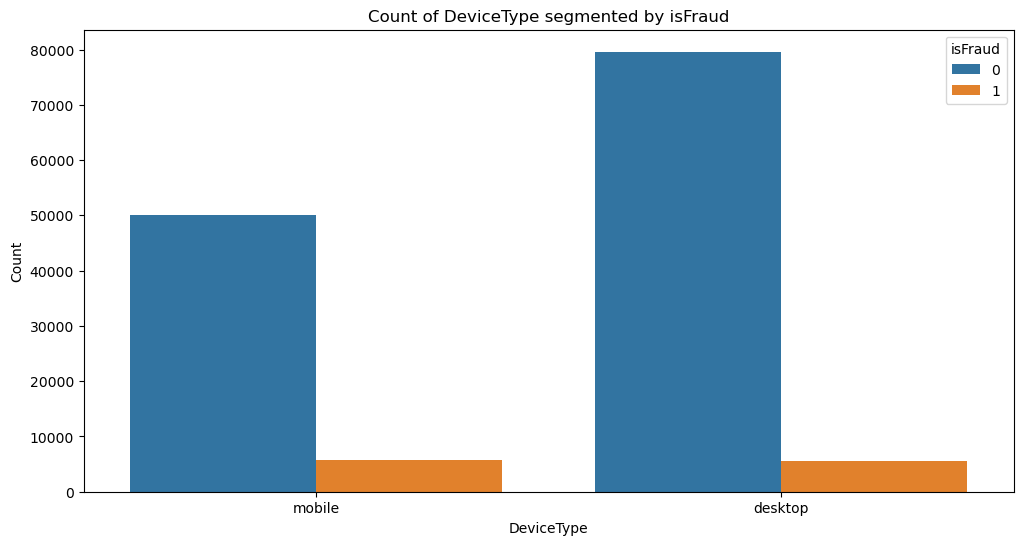

In [42]:
plot_countplot(train, "DeviceType", "isFraud")

In [45]:
num, categ = get_num_and_cat_features(train)

corr_matrix = train.corr(numeric_only=True)
fraud_corr = corr_matrix["isFraud"].sort_values(ascending=False)
print(fraud_corr)

isFraud           1.000000
V257              0.383060
V246              0.366878
V244              0.364129
V242              0.360590
V201              0.328005
V200              0.318783
V189              0.308219
V188              0.303582
V258              0.297151
V45               0.281832
V158              0.278066
V156              0.275952
V149              0.273282
V228              0.268861
V44               0.260376
V86               0.251828
V87               0.251737
V170              0.249794
V147              0.242894
V52               0.239469
V157              0.234866
V155              0.234199
V230              0.231740
V199              0.231024
V148              0.228891
V51               0.223191
V171              0.216508
V40               0.212442
V243              0.210238
V154              0.206958
V190              0.205148
V39               0.203097
V38               0.199005
V146              0.198584
V43               0.198274
V140              0.196938
V

# Export merged frames

In [48]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)